## 1. Requeriments

In [1744]:
# import torch
# print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cpu.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

## 2. Import libraries

In [1745]:
import torch
from torch_geometric.data import Data
import networkx as nx
import numpy as np
import pandas as pd
from sklearn import preprocessing
import random
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from torch_geometric.loader import DataLoader

## 3. Graph building

### 3.1. Gene matrix

In [1746]:
genes = pd.read_csv('../GNN+RN/Data/10000_most_relevant_genes_biogrid_found.csv')
Y = genes.Y

genes = genes.iloc[:,1:10001] 
genes

,A1BG,A1CF,A2M,A2ML1,A3GALT2,AADAC,AAMP,AARD,AARSD1,AASDH,...,ZSCAN5B,ZSWIM2,ZSWIM3,ZSWIM7,ZUFSP,ZWILCH,ZWINT,ZYX,ZZEF1,ZZZ3
0,30.187983,33.643965,37.130851,22.869853,21.807184,22.446140,34.740118,21.710004,32.883502,31.650847,...,21.64163,21.42780,28.95039,31.76873,27.82477,33.26816,30.04056,33.81903,33.22469,31.23383
1,30.483638,28.866645,37.945043,24.142100,21.807184,22.446140,34.265360,27.454455,33.407541,32.839872,...,29.27301,21.42780,28.35341,32.32573,30.30568,31.53633,29.94062,33.67262,33.10198,32.44643
2,30.092851,26.684228,36.851946,30.406352,21.807184,22.446140,34.708417,21.710004,32.137371,32.721578,...,29.06719,21.42780,29.05322,32.87654,30.86495,30.74474,31.95812,33.96047,32.97135,32.20607
3,30.975010,32.521494,38.453517,28.229357,26.484608,29.199458,35.123918,25.877077,33.514752,32.029916,...,24.01564,21.42780,29.98474,32.03101,31.17308,31.63196,30.71732,34.54254,33.24885,32.78278
4,26.915750,23.219176,38.931987,22.869853,21.807184,22.446140,33.197341,21.710004,33.642120,33.612674,...,21.64163,21.42780,28.24700,23.82298,32.42940,31.75620,30.75149,34.24375,34.86720,32.73361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,30.954407,26.161567,38.376185,24.438322,23.084563,20.633840,33.113039,25.777452,33.527049,33.832243,...,22.83467,21.64052,28.18196,32.14078,31.28319,31.62442,30.78532,34.41045,33.21697,32.22166
307,33.110149,26.161567,36.537388,24.438322,23.084563,24.832315,34.450999,21.428450,33.327444,32.673865,...,22.83467,21.64052,27.34719,34.40001,32.49032,31.40147,31.50200,32.69615,32.18970,32.59554
308,32.880283,31.822942,38.265866,24.438322,23.084563,28.212990,33.676334,21.428450,32.251713,33.279514,...,22.83467,21.64052,27.95018,30.64208,31.87077,31.21094,30.91066,35.02409,34.26388,32.82148
309,30.658715,32.930512,36.882090,24.438322,23.084563,20.633840,33.808583,21.428450,32.865904,31.904001,...,22.83467,21.64052,27.96503,31.93408,29.99395,31.12324,28.76312,34.07224,34.35116,31.98965


In [1747]:
scaler = preprocessing.MinMaxScaler()
names = genes.columns
d = scaler.fit_transform(genes)
genes = pd.DataFrame(d, columns=names)
genes

,A1BG,A1CF,A2M,A2ML1,A3GALT2,AADAC,AAMP,AARD,AARSD1,AASDH,...,ZSCAN5B,ZSWIM2,ZSWIM3,ZSWIM7,ZUFSP,ZWILCH,ZWINT,ZYX,ZZEF1,ZZZ3
0,0.614056,0.845335,0.488904,0.224501,0.179749,0.166779,0.653407,0.123933,0.368894,0.299150,...,0.114796,0.059637,0.695951,0.782164,0.519968,0.905521,0.707656,0.319148,0.319166,0.196466
1,0.628746,0.528869,0.642611,0.308414,0.179749,0.166779,0.564839,0.638562,0.499013,0.544557,...,0.621585,0.059637,0.636101,0.827143,0.748853,0.728920,0.698606,0.277535,0.289026,0.533031
2,0.609329,0.384299,0.436252,0.721581,0.179749,0.166779,0.647493,0.123933,0.183630,0.520142,...,0.607917,0.059637,0.706261,0.871623,0.800450,0.648199,0.881304,0.359348,0.256940,0.466317
3,0.653160,0.770979,0.738603,0.577995,0.674302,0.640172,0.725006,0.497250,0.525634,0.377388,...,0.272451,0.059637,0.799651,0.803344,0.828878,0.738672,0.768942,0.524786,0.325101,0.626387
4,0.451473,0.154762,0.828930,0.224501,0.179749,0.166779,0.365597,0.123933,0.557259,0.704058,...,0.114796,0.059637,0.625432,0.140523,0.944784,0.751341,0.772036,0.439863,0.722610,0.612739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0.652136,0.349676,0.724004,0.327951,0.314809,0.039741,0.349870,0.488324,0.528687,0.749376,...,0.194024,0.079748,0.618912,0.812208,0.839036,0.737903,0.775099,0.487243,0.317270,0.470644
307,0.759246,0.349676,0.376868,0.327951,0.314809,0.334045,0.599471,0.098709,0.479125,0.510294,...,0.194024,0.079748,0.535221,0.994647,0.950405,0.715168,0.840000,0.000000,0.064946,0.574417
308,0.747825,0.724704,0.703177,0.327951,0.314809,0.571023,0.454955,0.098709,0.212021,0.635296,...,0.194024,0.079748,0.595674,0.691184,0.893246,0.695739,0.786450,0.661653,0.574419,0.637128
309,0.637445,0.798074,0.441942,0.327951,0.314809,0.039741,0.479626,0.098709,0.364525,0.351400,...,0.194024,0.079748,0.597163,0.795516,0.720093,0.686796,0.591975,0.391116,0.595857,0.406248


In [1748]:
train_genes, test_genes, Y_train, Y_test = train_test_split(genes, Y, test_size=0.1, stratify=Y)

### 3.2. Graph edges

In [1749]:
path ='../Biogrid/Data/biogrid_minimum.edgelist'
G_initial = nx.read_edgelist(path)
G = G_initial.subgraph(genes.columns)
nx.write_edgelist(G, "Data/conected_graph.edgelist")
data = pd.read_csv("Data/conected_graph.edgelist", delimiter=' ')
edge_index1=data[data.columns[0]].to_numpy()
edge_index2=data[data.columns[1]].to_numpy()

In [1750]:
edge_index = np.concatenate((edge_index1, edge_index2))

In [1751]:
edge_index

array(['GRB7', 'RPS2', 'RPS2', ..., 'ZNF212', 'ZNF221', 'ZNF492'],
      dtype=object)

In [1752]:
le = preprocessing.LabelEncoder()
le.fit(edge_index)
len(list(le.classes_))

5122

In [1753]:
edge_index1 = le.transform(edge_index1)
edge_index2 = le.transform(edge_index2)

In [1754]:
edge_index = [edge_index1]+[edge_index2]
edge_index = np.array(edge_index)

In [1755]:
edge_index

array([[1700, 3692, 3692, ..., 5121, 4990, 5075],
       [3692, 3734, 1425, ..., 4985, 4988, 5036]])

In [1756]:
edge_index = torch.tensor(edge_index, dtype=torch.int64)
edge_index

tensor([[1700, 3692, 3692,  ..., 5121, 4990, 5075],
        [3692, 3734, 1425,  ..., 4985, 4988, 5036]])

### 3.3. Create dataset

In [1757]:
train_data=[]
for g in range(len(train_genes)):
  b=[]
  for i in train_genes.iloc[g].to_numpy():
    a=[]
    # a.append(Y[g])
    # a.append(i*100)
    a.append(i)
    b.append(a)
  x = torch.tensor([b], dtype=torch.float).reshape([-1,1])
  edge_index = edge_index
  y = torch.tensor([Y_train.iloc[g]], dtype=torch.float).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  train_data.append(data)

print(len(train_data))

279


In [1758]:
test_data=[]
for g in range(len(test_genes)):
  b=[]
  for i in test_genes.iloc[g].to_numpy():
    a=[]
    # a.append(Y[g])
    # a.append(i*100)
    a.append(i)
    b.append(a)
  x = torch.tensor([b], dtype=torch.float).reshape([-1,1])
  edge_index = edge_index
  y = torch.tensor([Y_test.iloc[g]], dtype=torch.float).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  test_data.append(data)

print(len(test_data))

32


In [1759]:
# def plot_graph(data,description=True):
#     edges_raw = data.edge_index.numpy()
#     edges = [(x, y) for x, y in zip(edges_raw[0, :], edges_raw[1, :])]
#     labels = data.x.numpy()
#     G = nx.Graph()
#     G.add_nodes_from(list(range(np.max(edges_raw))))
#     G.add_edges_from(edges)
#     plt.subplot(111)
#     options = {
#        'node_size': 100,
#        'width': 1,
#     }
#     nx.draw(G, with_labels=description, node_color=labels.tolist(), cmap=plt.cm.tab10, font_weight='bold', **options)
#     plt.show()

# plot_graph(data,True)

In [1760]:
data

Data(x=[10000, 1], edge_index=[2, 4010], y=[1, 1])

In [1761]:
data.x

tensor([[0.5899],
        [0.8862],
        [0.6051],
        ...,
        [0.2787],
        [0.3636],
        [0.6011]])

### 3.4. Patient sample

In [1762]:
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of charcateristics per node: {data.num_features}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')
print(f'Number of node features: {data.num_node_features}')


Number of nodes: 10000
Number of charcateristics per node: 1
Number of edges: 4010
Average node degree: 0.40
Has isolated nodes: True
Has self-loops: False
Is undirected: False
Number of node features: 1


## 4. Graph training

### 4.2. Training and testing the model

In [1763]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GraphConv
from torch_geometric.nn import SAGPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
from torch import nn

In [1764]:
# import torch
# import torch.nn.functional as F
# from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
# from torch_geometric.nn import GCNConv, GINConv
# from torch_geometric.nn import global_mean_pool, global_add_pool
# embed_dim = 32

# class Net(torch.nn.Module):
#     def __init__(self, dim_h):
#         super(Net, self).__init__()
#         self.conv1 = GCNConv(1, dim_h)
#         self.conv2 = GCNConv(dim_h, dim_h)
#         self.conv3 = GCNConv(dim_h, dim_h)
#         self.lin = Linear(dim_h, 1)

#     def forward(self, x, edge_index, batch):
#         # Node embeddings 
#         h = self.conv1(x, edge_index)
#         h = h.relu()
#         h = self.conv2(h, edge_index)
#         h = h.relu()
#         h = self.conv3(h, edge_index)

#         # Graph-level readout
#         hG = global_mean_pool(h, batch)

#         # Classifier
#         h = F.dropout(hG, p=0.5, training=self.training)
#         h = self.lin(h)
        
#         return F.sigmoid(h).squeeze(1)


In [1765]:
# import torch
# import torch.nn.functional as F
# from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
# from torch_geometric.nn import GCNConv, GINConv
# from torch_geometric.nn import global_mean_pool, global_add_pool

# class GIN(torch.nn.Module):
#     def __init__(self, dim_h):
#         super(GIN, self).__init__()
#         self.conv1 = GINConv(
#             Sequential(Linear(1, dim_h),
#                        BatchNorm1d(dim_h), ReLU(),
#                        Linear(dim_h, dim_h), ReLU()))
#         self.conv2 = GINConv(
#             Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
#                        Linear(dim_h, dim_h), ReLU()))
#         self.conv3 = GINConv(
#             Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
#                        Linear(dim_h, dim_h), ReLU()))
#         self.lin1 = Linear(dim_h*3, dim_h*3)
#         self.lin2 = Linear(dim_h*3, 1)

#     def forward(self, x, edge_index, batch):
#         # Node embeddings 
#         h1 = self.conv1(x, edge_index)
#         h2 = self.conv2(h1, edge_index)
#         h3 = self.conv3(h2, edge_index)

#         # Graph-level readout
#         h1 = global_add_pool(h1, batch)
#         h2 = global_add_pool(h2, batch)
#         h3 = global_add_pool(h3, batch)

#         # Concatenate graph embeddings
#         h = torch.cat((h1, h2, h3), dim=1)

#         # Classifier
#         h = self.lin1(h)
#         h = h.relu()
#         h = F.dropout(h, p=0.5, training=self.training)
#         h = self.lin2(h)
#         m = nn.Sigmoid()
#         # print(F.log_softmax(h, dim=1))
#         # print(m(h))
#         return m(h)
#         # return F.log_softmax(h, dim=1)

In [1766]:
import torch
import torch.nn.functional as F
from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
from torch_geometric.nn import GCNConv, GINConv
from torch_geometric.nn import global_mean_pool, global_add_pool

class GIN(torch.nn.Module):
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(1, dim_h),
                       BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.lin1 = Linear(dim_h*3, dim_h*3)
        self.lin2 = Linear(dim_h*3, 1)

    def forward(self, x, edge_index, batch):
        # Node embeddings 
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        h = torch.cat((h1, h2, h3), dim=1)

        # Classifier
        h = self.lin1(h)
        h = h.relu()
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)
        m = nn.Sigmoid()
        # print(F.log_softmax(h, dim=1))
        # print(m(h))
        return m(h)
        # return F.log_softmax(h, dim=1)

In [1767]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
def train(model, train_loader, optimizer, criterion):
    total_loss = 0
    acc = 0
    for data in train_loader:
        optimizer.zero_grad()
        output = model(data.x, data.edge_index, data.batch)
        # print("output")
        # print(output)
        # print("argmax")
        # print(output.argmax(dim=1))
        # print("data.y")
        # print(data.y)
        # print("round(output)")
        # print(torch.round(output))
        loss = criterion(output, data.y)  
        total_loss += loss / len(train_loader)
        acc += accuracy(torch.round(output), data.y) / len(train_loader)
        # acc = accuracy_score(data.y, torch.round(output))
        # f1score = f1_score(data.y, torch.round(output), average='weighted')
        loss.backward()
        optimizer.step()
        # loss_all += loss.item() * data.num_graphs
    return total_loss, acc, 1#f1score

    
@torch.no_grad()
def validation(model, val_loader, criterion):
    model.eval()
    acc = 0
    loss = 0
    for data in val_loader:
        output = model(data.x, data.edge_index, data.batch)
        loss += criterion(output, data.y)#/ len(val_loader)
        acc += accuracy(torch.round(output), data.y) / len(val_loader)
        # acc = accuracy_score(data.y, output.argmax(dim=1))
        # f1score = f1_score(data.y, torch.round(output), average='weighted')
    return loss, acc, 1#f1score

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

def test(model, test_data):
    acc = 0
    test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
    for data in test_loader:
        output = model(data.x, data.edge_index, data.batch)
        acc += accuracy(torch.round(output), data.y) / len(test_loader)
        # f1score = f1_score(data.y, torch.round(output), average='weighted')
    return acc, 1#f1score


In [1768]:
from sklearn.model_selection import StratifiedKFold # import KFold
kf=StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [1769]:
val_avg = []
test_avg = []
test_f1_score = []
for train_index, val_index in kf.split(train_data, Y_train):
    train_dataset=[]
    val_dataset=[]
    print("TRAIN: ", train_index, "TEST:", val_index)
    for i in train_index:
        train_dataset.append(train_data[i])
    for i in val_index:
        val_dataset.append(train_data[i])

    print(len(train_dataset))
    print(len(val_dataset))

    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

    model = GIN(dim_h=8)
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.6)
    # optimizer = torch.optim.Adadelta(model.parameters(), lr=0.7)
    train_epoch=[]
    val_epoch=[]
    train_loss_=[]
    val_loss_=[]
    epochs = 400
    train_acc=0
    criterion = nn.BCELoss()

    for epoch in range(epochs+1):
        train_loss, train_acc, train_f1score = train(model, train_loader, optimizer, criterion)
        val_loss, val_acc, val_f1score = validation(model, val_loader, criterion)

        train_loss = train_loss.detach().numpy()
        train_loss_.append(train_loss)
        val_loss_.append(val_loss.detach().numpy())
        train_epoch.append(train_acc)
        val_epoch.append(val_acc)
        
        print(f'Epoch: {epoch:03d}, Train loss: {train_loss:.4f}, '
            f'Train Acc: {train_acc:.4f}, Train f1-score: {train_f1score:.4f}, Val loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val f1-score: {val_f1score:.4f},')

    test_acc, test_f1score = test(model, test_data)
    print("GIN accuracy: " + str(test_acc))

    # fig, (ax1, ax2) = plt.subplots(1, 2)
    # ax1.plot(train_epoch, color="red", label="train acc")
    # ax1.plot(val_epoch, color="blue", label="test acc")
    # ax2.plot(train_loss_, color="orange", label="train loss")
    # ax2.plot(val_loss_, color="purple", label="test acc")
    # ax1.set_xlabel("Epoch")
    # ax1.set_ylabel("Accuracy")
    # ax2.set_xlabel("Epoch")
    # ax2.set_ylabel("Loss")
    # ax1.legend()
    # ax2.legend()

    plt.plot(train_epoch, color="red")
    plt.plot(val_epoch, color="blue")
    plt.plot(train_loss_, color="orange")
    plt.plot(val_loss_, color="purple")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    val_avg.append(val_acc)
    test_avg.append(test_acc)
    test_f1_score.append(test_f1score)

print('Val accuracy: '+ str(np.array(val_avg).mean()))
print('Test accuracy: '+ str(np.array(test_avg).mean()))
print('Test f1-score: '+ str(np.array(test_f1_score).mean()))

print('Val stv: '+ str(np.array(val_avg).std()))
print('Test stv: '+ str(np.array(test_avg).std()))

TRAIN:  [ 53  54  55  58  59  60  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 

KeyboardInterrupt: 

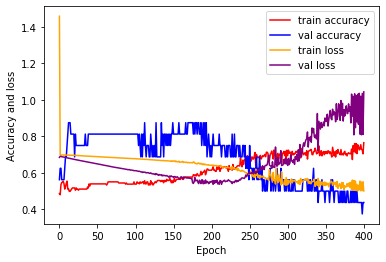

In [ ]:
plt.plot(train_epoch, color="red", label="train accuracy")
plt.plot(val_epoch, color="blue", label="val accuracy")
plt.plot(train_loss_, color="orange", label="train loss")
plt.plot(val_loss_, color="purple", label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy and loss")
plt.legend()